In [1]:
from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io

In [2]:
import numpy as np
from skimage import io
from scipy.misc import imread, imsave
import os
import imageio
import json
import matplotlib.pyplot as plt
from shutil import copy

from AxonDeepSeg.apply_model import axon_segmentation
from AxonDeepSeg.testing.segmentation_scoring import *

%matplotlib inline

In [4]:
path_img = '/Users/rudinakaprata/Documents/Aldo/ads_feb/axondeepseg/AxonDeepSeg/data_test/image.png'

In [9]:
img = imageio.imread(path_img)
path_folder, file_name = os.path.split(path_img)

# Prediction image (output of AxonDeepSeg)
pred = imageio.imread(os.path.join(path_folder,'image_segmented.png'))
pred_axon = pred > 200
pred_myelin = np.logical_and(pred >= 50, pred <= 200)
pred_both = pred > 100

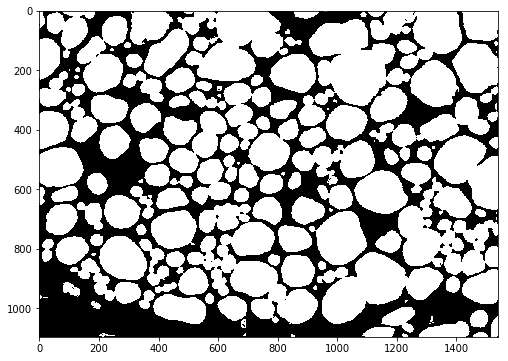

In [10]:
plt.figure(figsize=(10,6))
plt.imshow(pred_both, cmap='gray')

In [12]:
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max




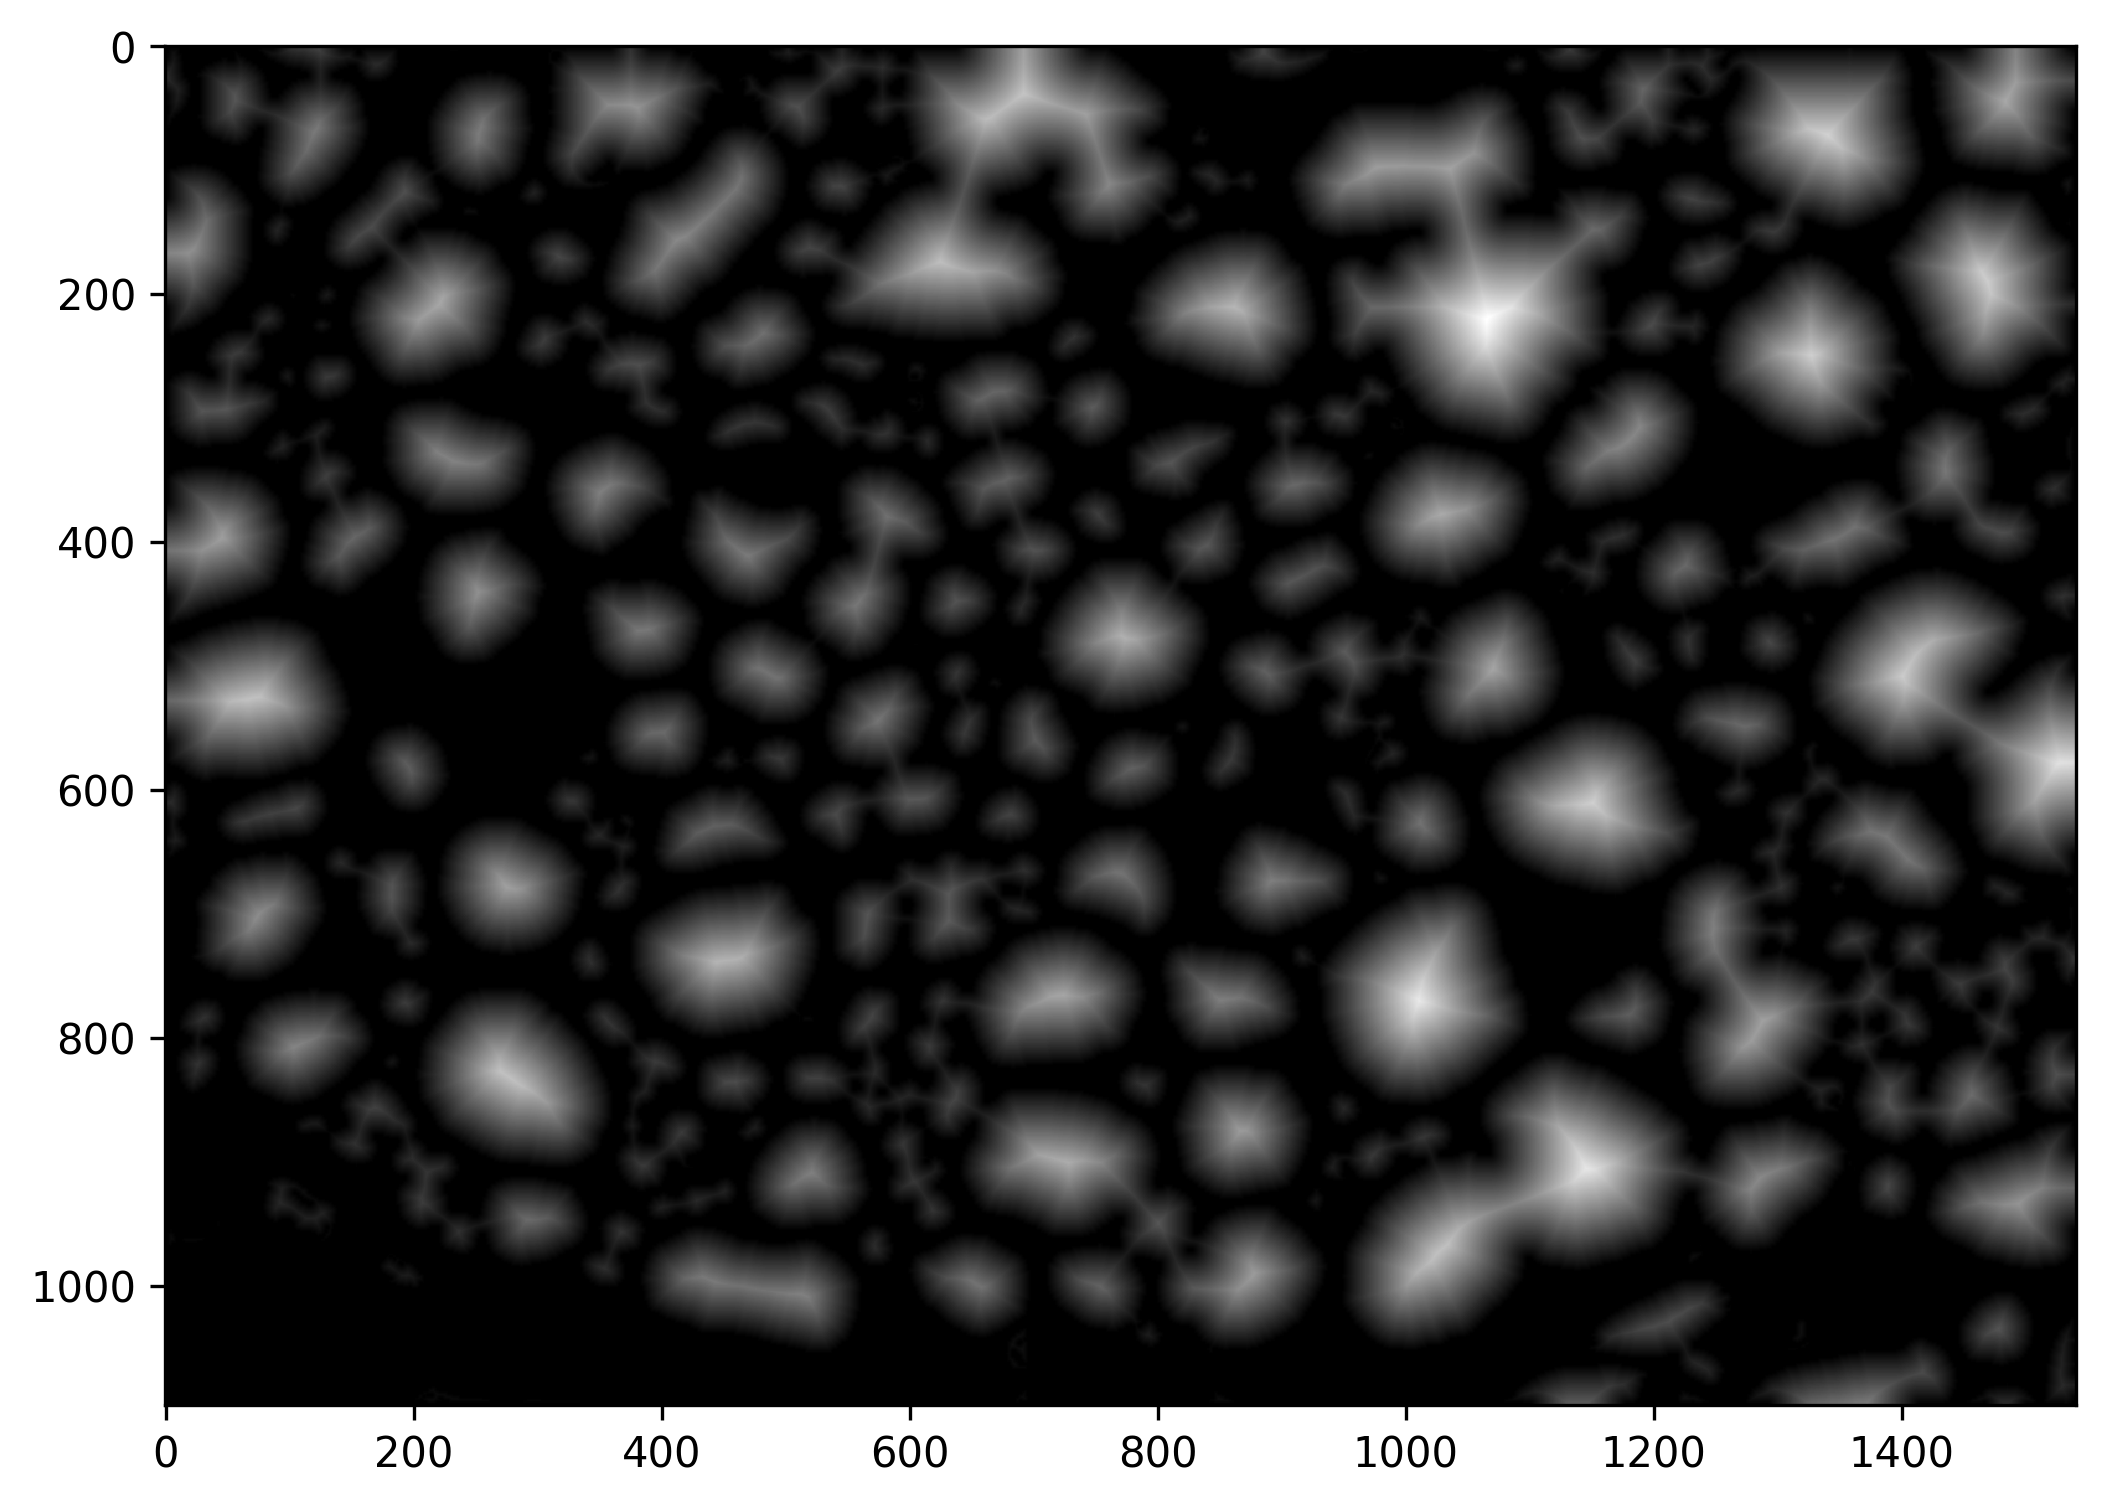

In [73]:
distance = ndi.distance_transform_edt(pred_both)
plt.figure(dpi=300,figsize=(10,6))
plt.imshow(distance, cmap='gray')

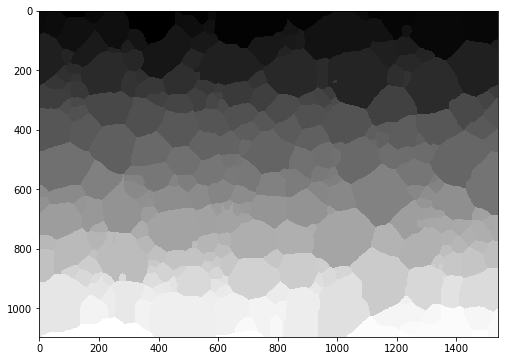

In [75]:
markers, num_features = ndi.label(pred_axon)
labels = watershed(-distance, markers)
#labels = watershed(-distance, markers, mask=pred_both)
plt.figure(figsize=(10,6))
plt.imshow(labels,cmap='gray')





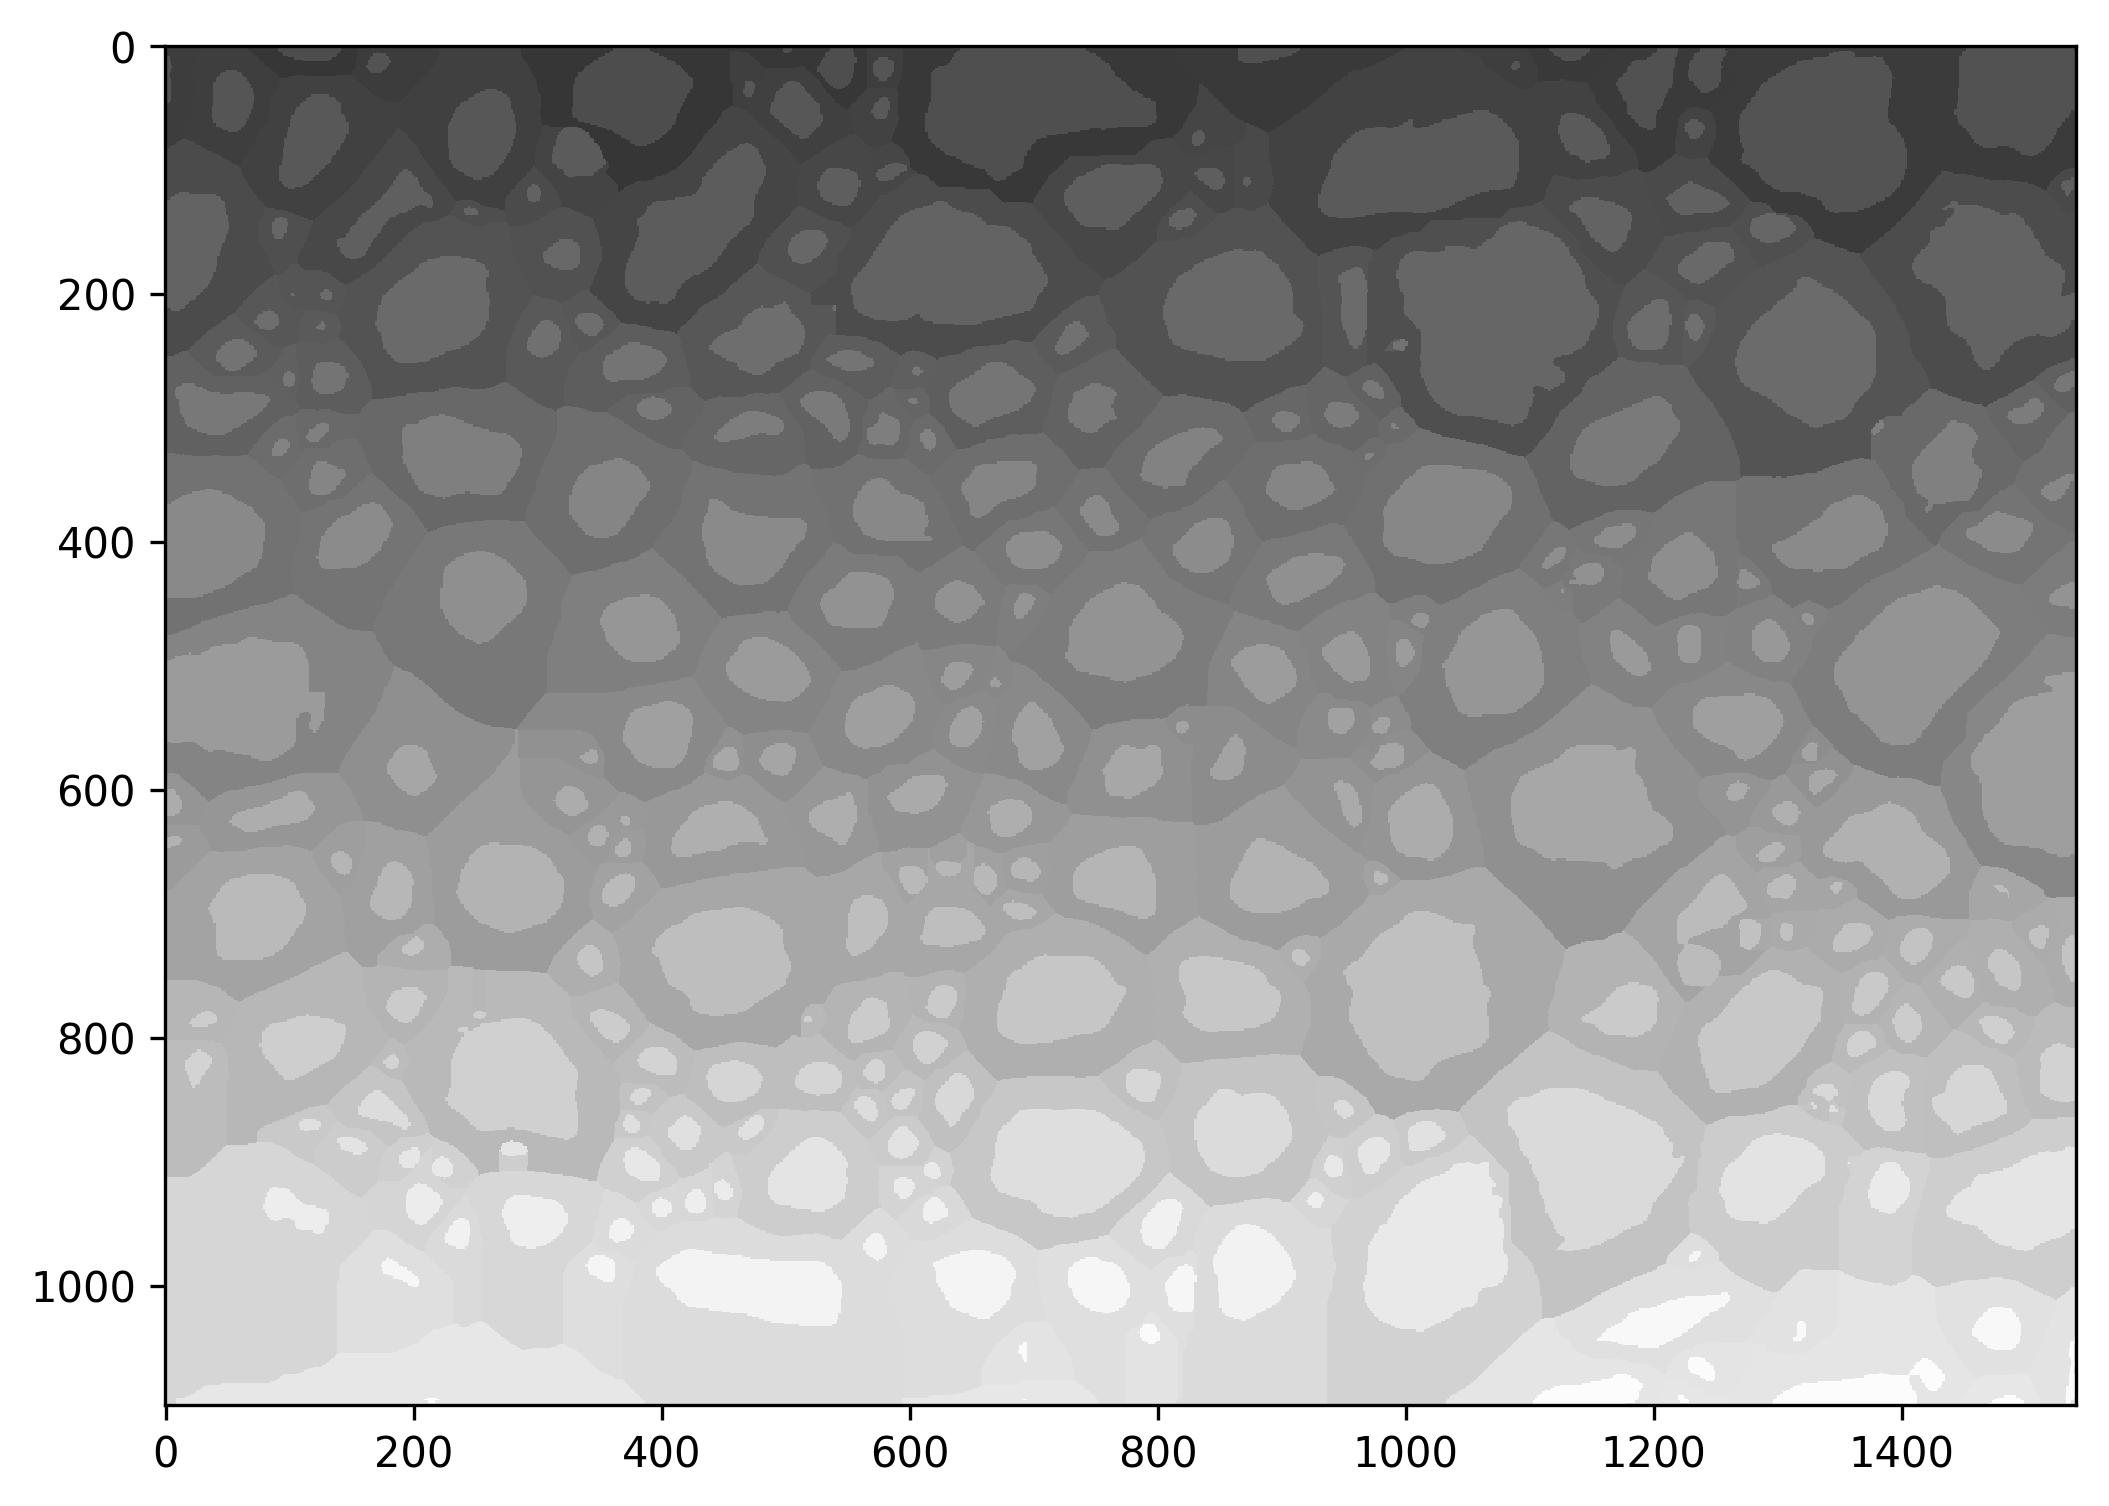

In [80]:

plt.figure(dpi=300,figsize=(10,6))
plt.imshow(pred_axon, cmap='gray', alpha=0.3)
plt.imshow(labels,cmap='gray', alpha=0.7)


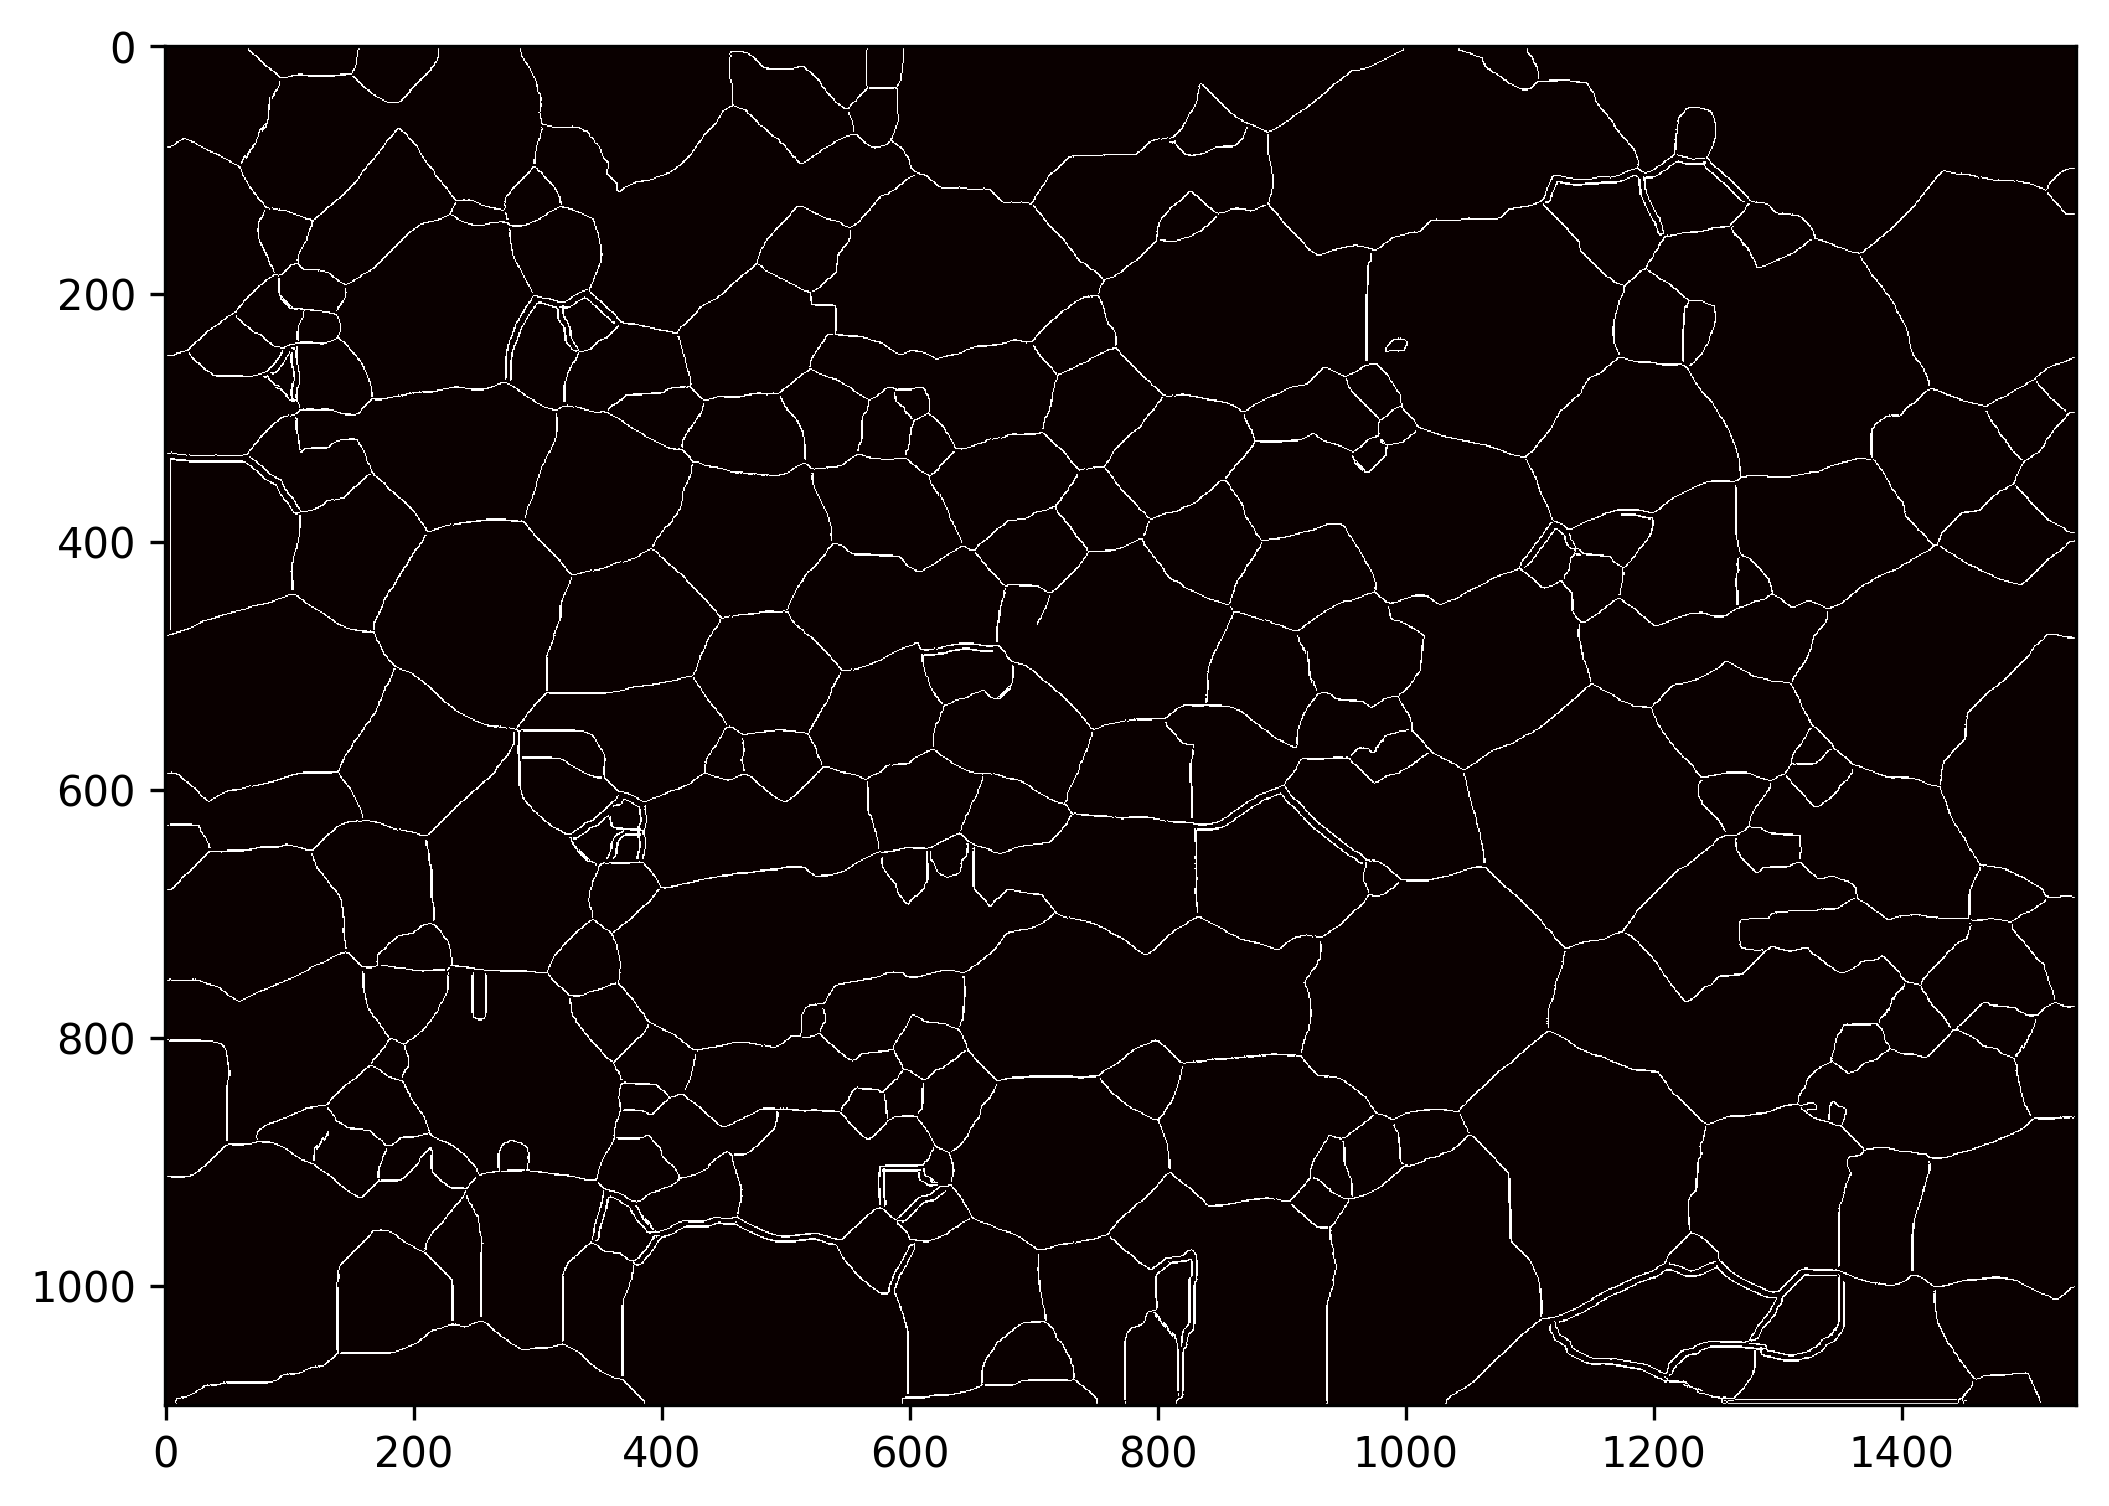

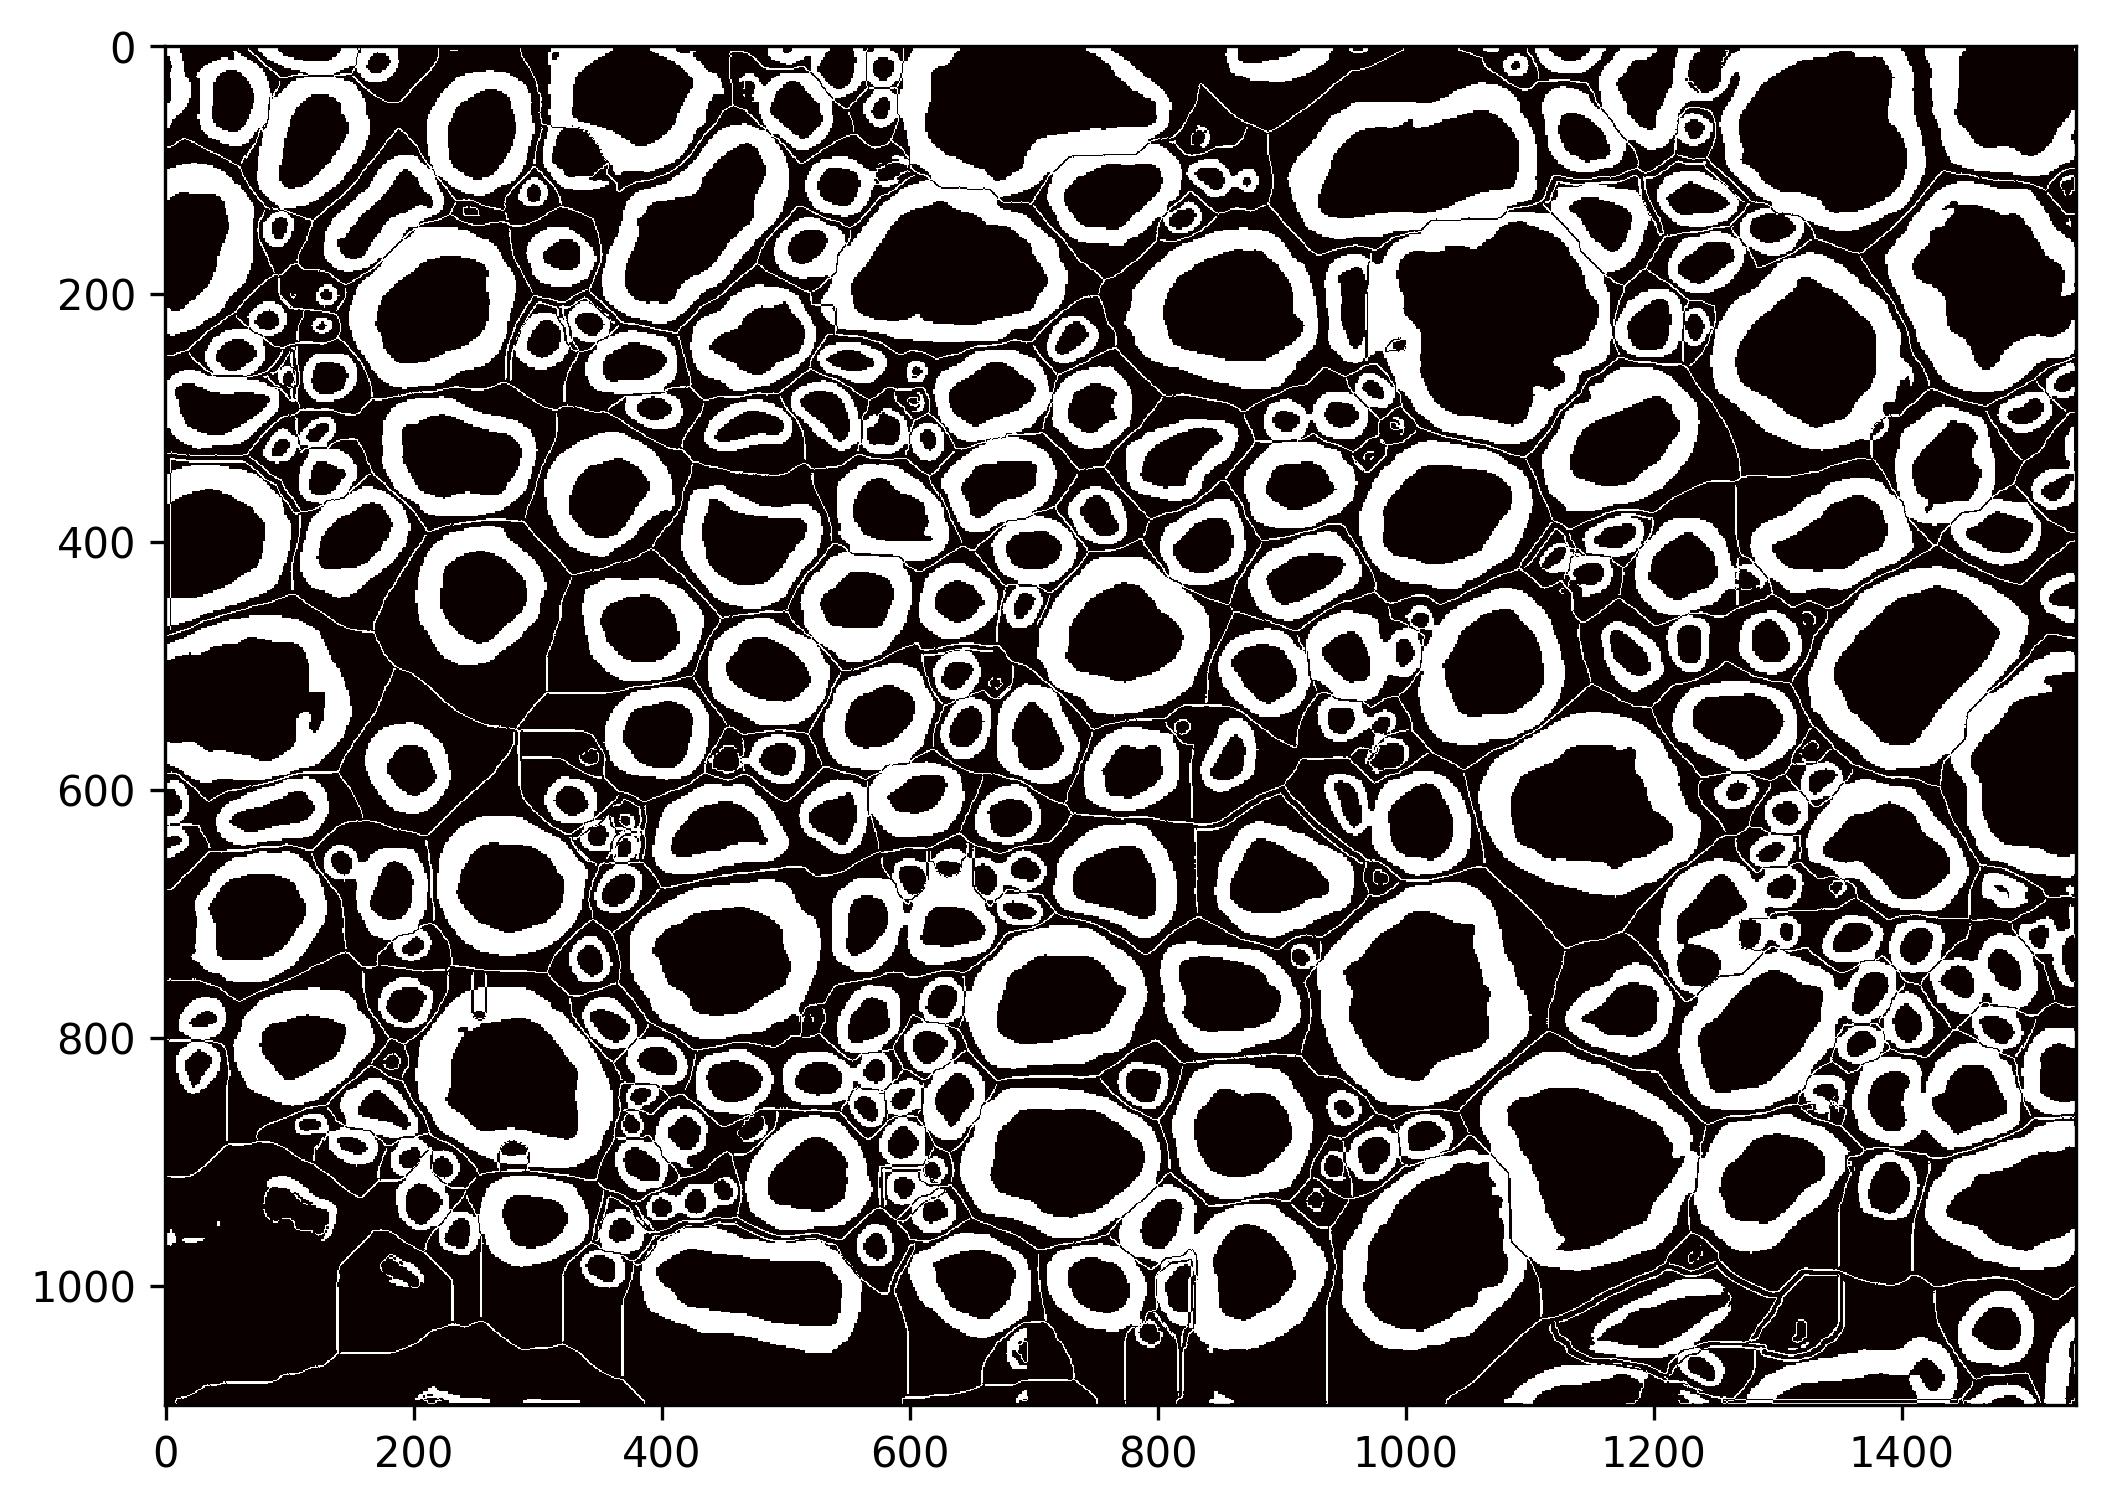

In [137]:
from skimage import feature

bbb = np.ones((pred_axon.shape[0], pred_axon.shape[1]))-pred_axon
bbb = bbb > 0.01

aaa=labels

edges = feature.canny(aaa,low_threshold=0,high_threshold=10)
plt.figure(figsize=(10,6),dpi=300)
plt.imshow(edges,cmap='hot')

final = pred_myelin ^ edges
#final = np.logical_and(pred_myelin == 0, edges ==1)
plt.figure(figsize=(10,6),dpi=300)
plt.imshow(final,cmap='hot')


In [99]:
print pred_axon.shape[0]

1096


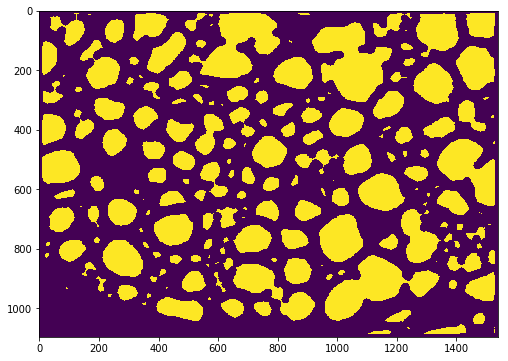

In [58]:
str_elem = disk(11)
pred_eroded = binary_erosion(pred_both, str_elem)
plt.figure(figsize=(10,6))
plt.imshow(pred_eroded)

In [ ]:
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)))
#local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=pred_both)
plt.figure(figsize=(10,6))
plt.imshow(local_maxi, cmap='gray')

In [ ]:
markers = ndi.label(pred_axon)[0]
labels = watershed(-distance, markers)

plt.figure(figsize=(10,6))
plt.imshow(labels)

In [ ]:
distance = ndimage.distance_transform_edt(image)

# Here's one way to measure the number of coins directly
# from the distance map
coin_centres = (distance > 0.8 * distance.max())
print('Number of coins (method 1):', np.max(label(coin_centres)))

# Or you can proceed with the watershed labeling
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)


markers, num_features = ndimage.label(local_maxi)
labels = watershed(-distance, markers, mask=image)

# ...but then you have to clean up the tiny intersections between coins
regions = regionprops(labels)
regions = [r for r in regions if r.area > 50]

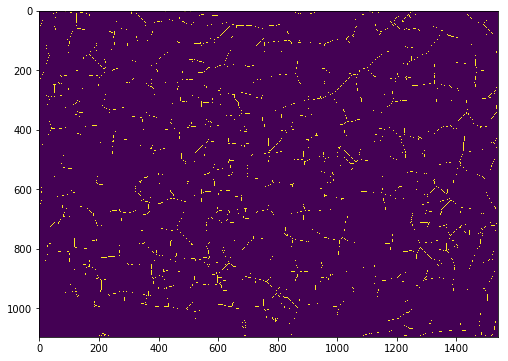

In [32]:
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.data import binary_blobs


a=skeletonize(pred_both)
plt.figure(figsize=(10,6))
plt.imshow(a)

In [34]:
# Compute axon morphometrics
from AxonDeepSeg.morphometrics.compute_morphometrics import *
stats_array = get_axon_morphometrics(pred_axon,path_folder)

In [39]:
y0 = [d['y0'] for d in stats_array]
x0 = [d['x0'] for d in stats_array]

In [40]:
markers = ndi.label(local_maxi)
labels = watershed(-distance, markers)

plt.figure(figsize=(10,6))
plt.imshow(labels)

AttributeError: 'tuple' object has no attribute 'shape'

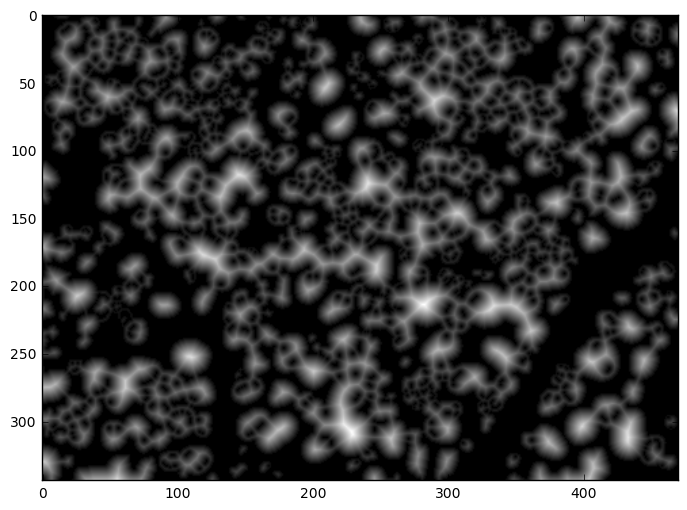

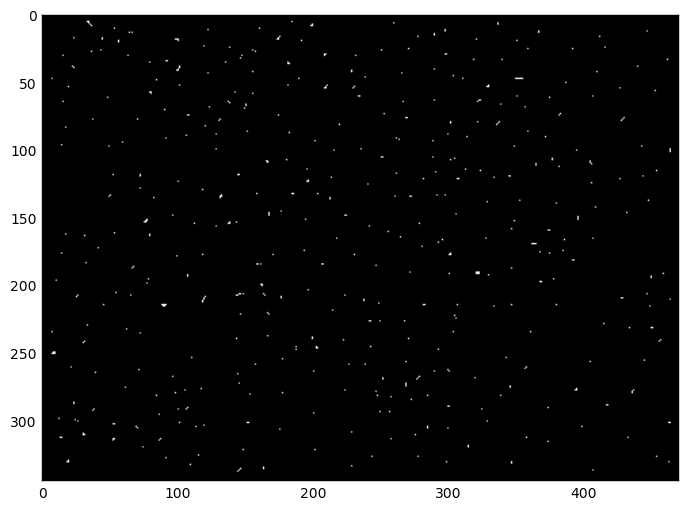

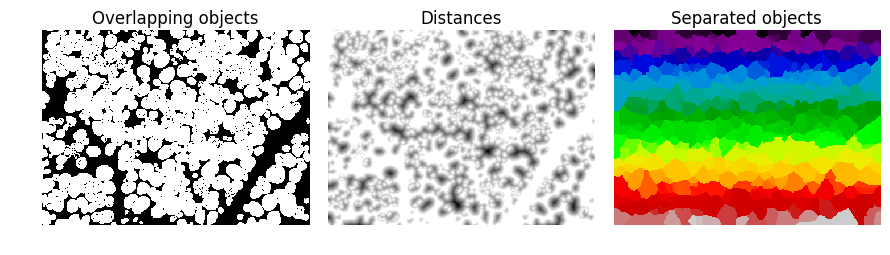

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


image=bw

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
plt.figure(figsize=(10,6))
plt.imshow(distance, cmap='gray')

local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((11, 11)))

plt.figure(figsize=(10,6))
plt.imshow(local_maxi, cmap='gray')


markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

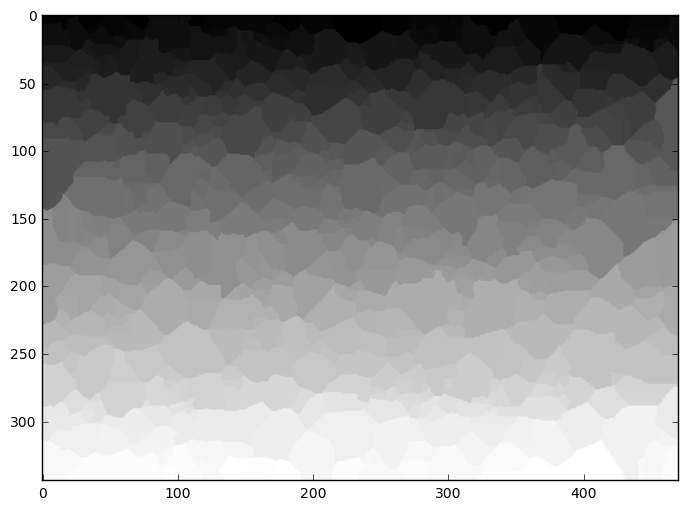

In [66]:
plt.figure(figsize=(10,6))
plt.imshow(labels, cmap='gray')